#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT VALUE OF "SURVIVED" FEATURE OF TITANIC KAGGLE CASE

In [83]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import model_selection
from sklearn import svm
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest

from xgboost import XGBClassifier

#### LOADING TRAIN AND TEST DATA

In [84]:
data_train = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Titanic - Machine Learning from Disaster/train.csv")
data_test = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Titanic - Machine Learning from Disaster/test.csv")

#### PRINTING DATA TRAIN

In [85]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### CREATING AND PRINTING DATASET AS A LIST

In [86]:
dataset = [data_train, data_test]

dataset

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

#### DATASET DUPLICATES CHECKING

In [87]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### PRINTING INFORMATION OF DATA TRAIN - WE WANT TO KNOW HOW MANY CELLS OF DATA TRAIN ARE NOT-NULL AND WHAT TYPE OF DATA IS DEFINED FOR DIFFERENT FEATURES (COLUMNS)

In [88]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### PRINTING SUM OF NULL DATA FOR DATASET

In [89]:
for data in dataset:
    print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### DEFINING PRECENTAGE_MISSING_VALUES FUNCTION TO PLOT PERCENTAGES OF MISSING VALUES FOR EACH FEATURE

In [90]:
def Percentage_Missing_Values(df, missing_data_treshold):
    
    features_to_drop = []
            
    if df.isnull().sum().sum() != 0:
        
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
                      
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        
        f, ax = plt.subplots(figsize=(15, 12))
        plt.xticks(rotation='vertical')
        sns.barplot(x=na_df.index, y=na_df)
        
        ax.bar_label(ax.containers[0], fontsize=10, labels= round(na_df, 2))
        
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        
        for missing_index, missing_value in zip(missing_data['Missing Ratio %'].index, missing_data['Missing Ratio %'].values):
            if missing_value > missing_data_treshold:
                features_to_drop.append(missing_index)
                        
        return features_to_drop
        
    else:
        print('No NAs found')

#### PLOTTING BAR CHART FOR DATA TRAIN WITH % OF MISSING VALUES FOR EACH FEATURE

['Cabin', 'Age']

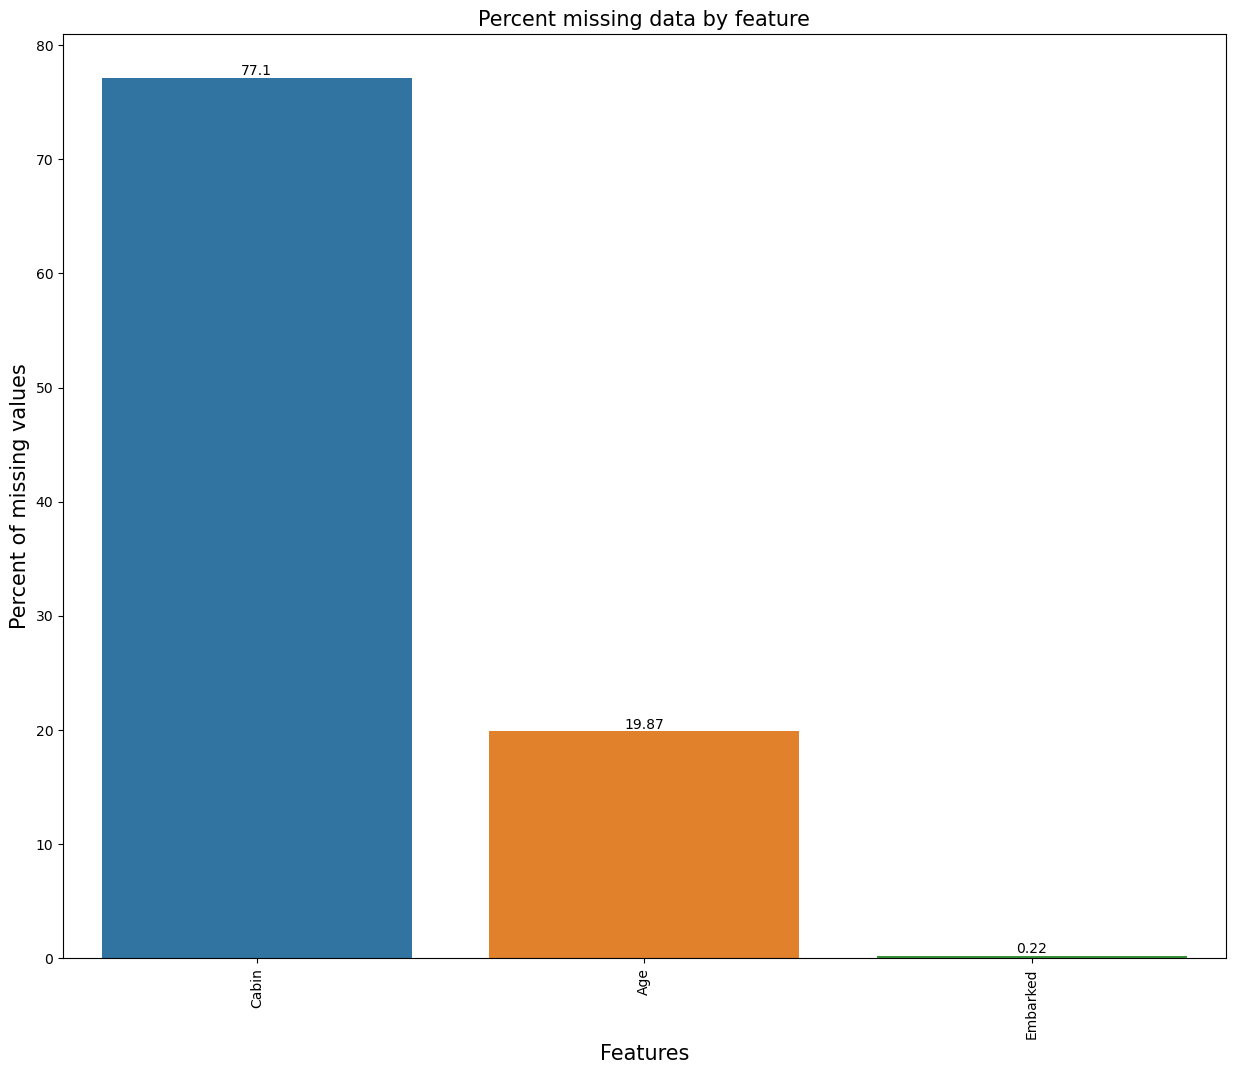

In [91]:
Percentage_Missing_Values(data_train, 10)

#### PLOTTING BAR CHART FOR DATA TEST WITH % OF MISSING VALUES FOR EACH FEATURE

['Cabin', 'Age']

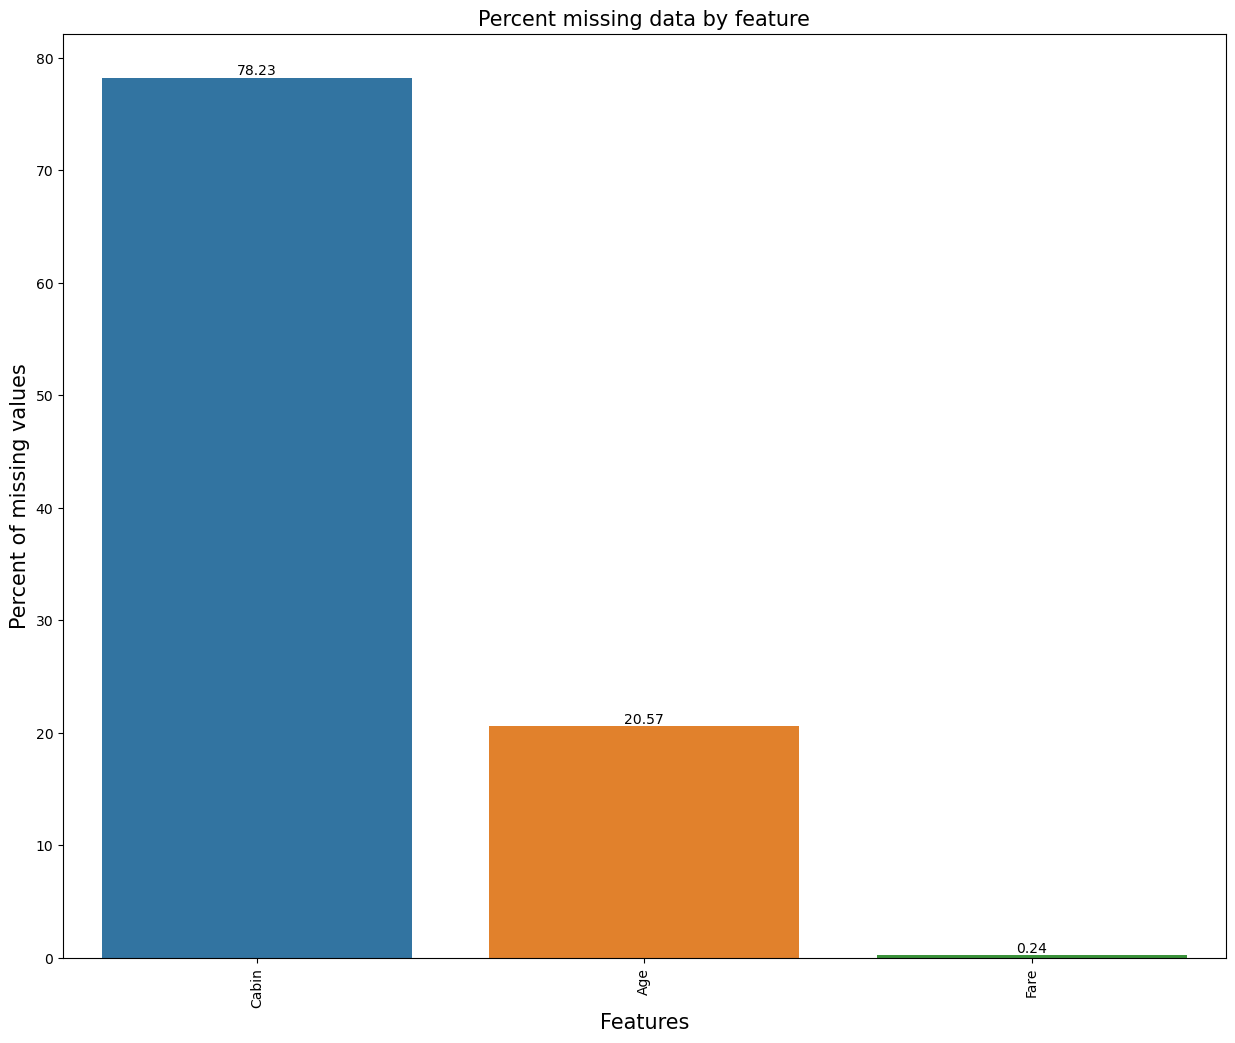

In [92]:
Percentage_Missing_Values(data_test, 10)

#### PRINTING UNIQUE VALUES OF DATA FOR DATASET

In [93]:
for data in dataset:
    print(data.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


#### PLOTTING BAR CHART AND PIE PLOT TO CHECK IMBALANCE OF DEPENDENT FEATURE

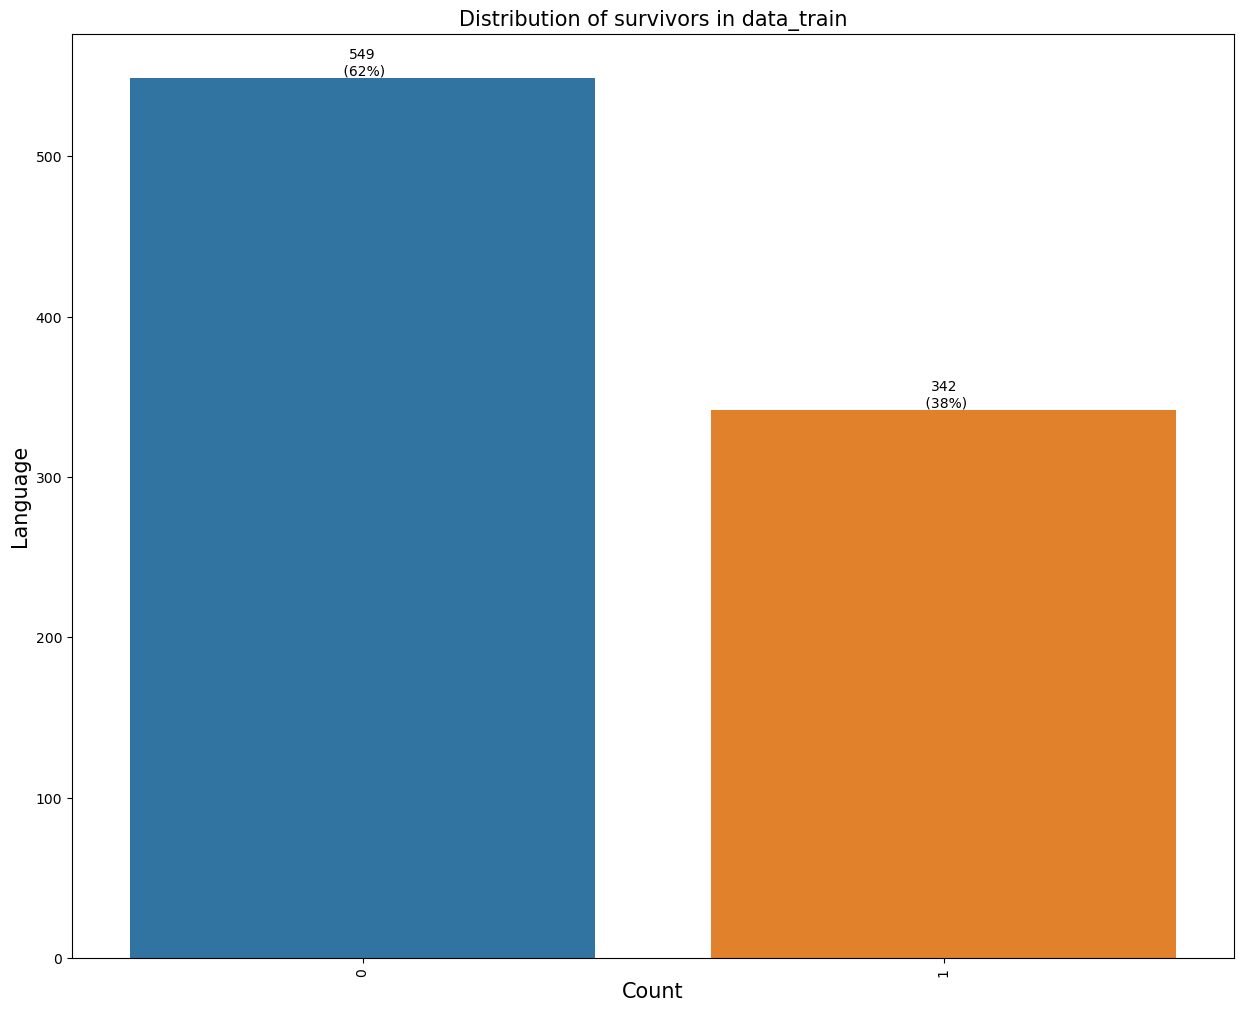

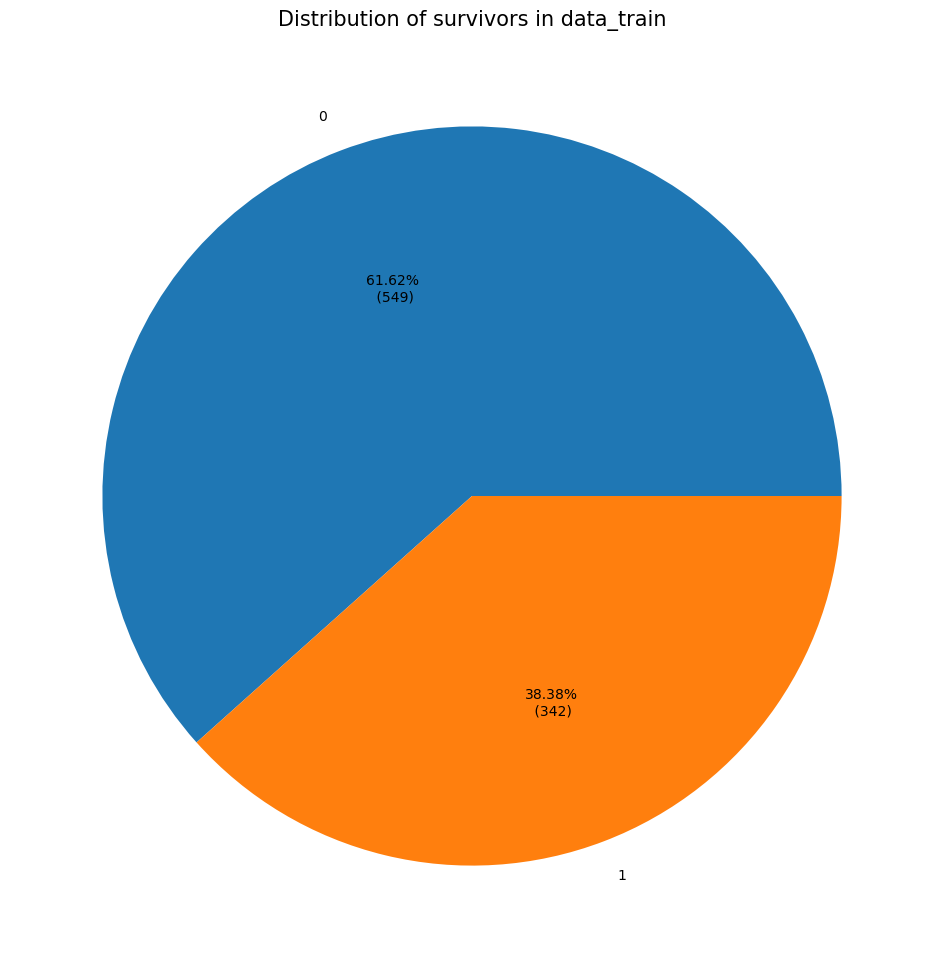

In [94]:
absolute_values = data_train['Survived'].value_counts()
relative_values = data_train['Survived'].value_counts(ascending=False, normalize=True).values * 100
bar_labels = [f'{values[0]}\n ({values[1]:.0f}%)' for values in zip(absolute_values, relative_values)]

plt.subplots(figsize=(15, 12))
ax = sns.barplot(x=data_train['Survived'].value_counts().index, 
                 y=data_train['Survived'].value_counts(), errorbar=None)
ax.bar_label(ax.containers[0], 
             fontsize=10, 
             labels=bar_labels)
plt.xticks(rotation='vertical')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Language', fontsize=15)
plt.title('Distribution of survivors in data_train', fontsize=15)
plt.show()


plt.subplots(figsize=(15, 12))
plt.pie(x=data_train['Survived'].value_counts(), 
        labels=data_train['Survived'].unique(), 
        autopct= lambda value: '{:.2f}%\n ({:.0f})'.format(value,(value/100)*absolute_values.sum()))
plt.title('Distribution of survivors in data_train', fontsize=15)
plt.show()

#### PRINTING FIRST 5 OBSERVATIONS FOR DATA_TRAIN

In [95]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO SURVIVED FEATURE

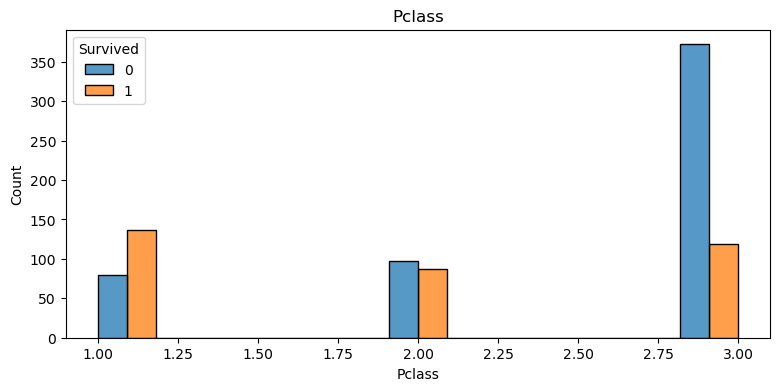

In [96]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Pclass',
             hue='Survived',
             multiple='dodge')
plt.title('Pclass')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO SEX FEATURE

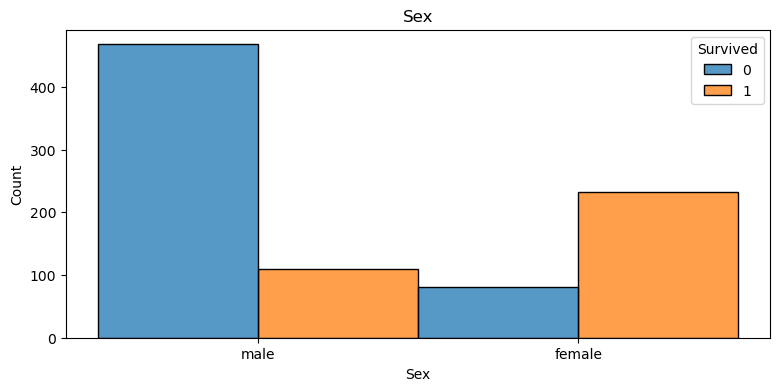

In [97]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Sex',
             hue='Survived',
             multiple='dodge')
plt.title('Sex')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO AGE FEATURE

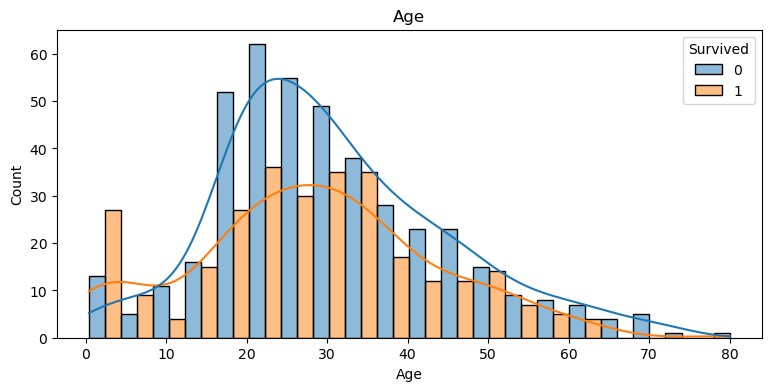

In [98]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Age',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('Age')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO SIBLINGS FEATURE

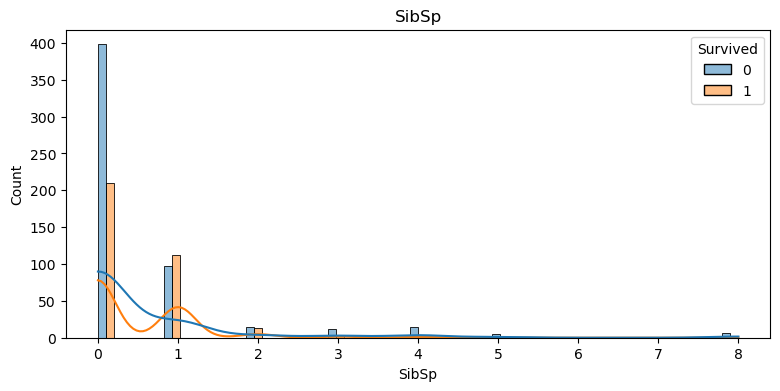

In [99]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='SibSp',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('SibSp')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO PARCH FEATURE

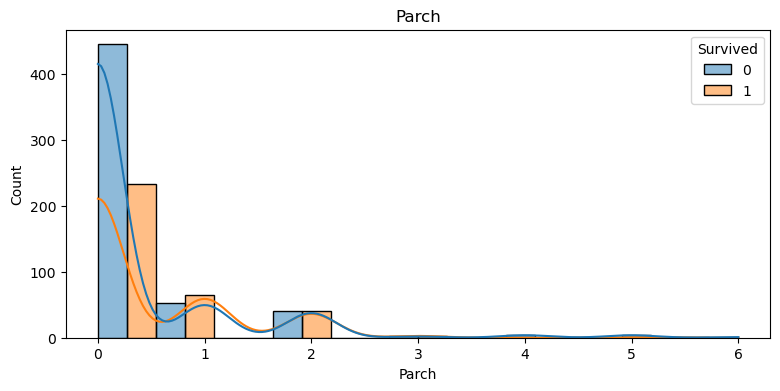

In [100]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Parch',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('Parch')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO FARE FEATURE

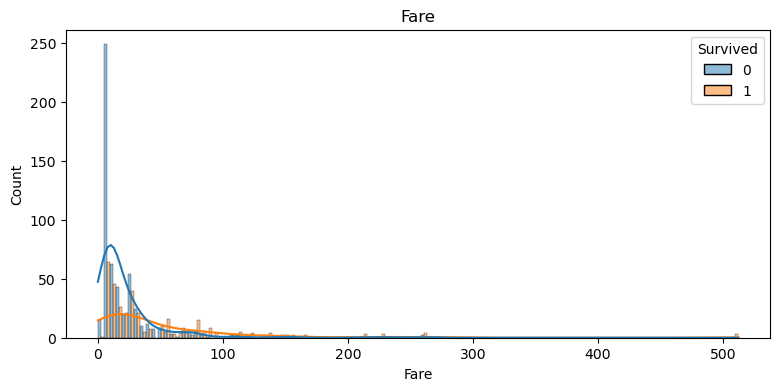

In [101]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Fare',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('Fare')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO EMBARKED FEATURE

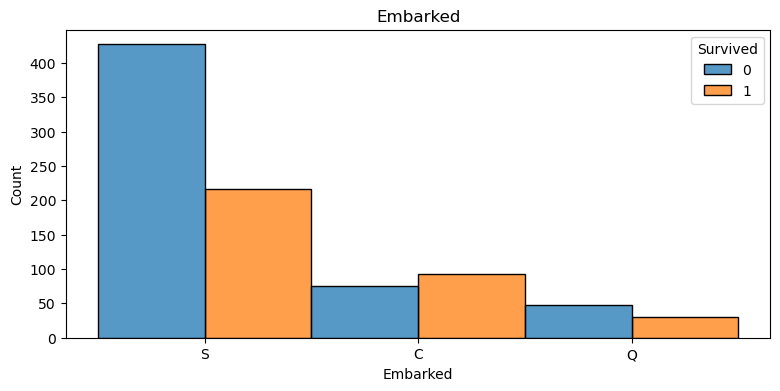

In [102]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Embarked',
             hue='Survived',
             multiple='dodge')
plt.title('Embarked')
plt.show()

#### DELETING PASSENGER_ID, NAME, TICKET AND CABIN FEATURES FROM DATASET

In [103]:
for data in dataset:
    del data['PassengerId']
    del data['Name']
    del data['Ticket']
    del data['Cabin']

#### PRINTING DATA_TRAIN

In [104]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### PRINTING SUM OF NULL DATA FOR DATASET

In [105]:
for data in dataset:
    print(data.isnull().sum())
    print(data.info())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----

#### FILLING MISSING VALUES WITH MEAN FOR NUMERIC ENTITIES AND MODE FOR CATEGORICAL FEATURES

In [106]:
for data in dataset:
    data['Age'].fillna(value = data['Age'].mean(), inplace= True)
    data['Embarked'].fillna(value = data['Embarked'].mode().iloc[0], inplace= True)
    data['Fare'].fillna(value = data['Fare'].mean(), inplace= True)

#### PRINTING SUM OF NULL DATA FOR DATASET

In [107]:
for data in dataset:
    print(data.isnull().sum())
    print(data.info())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 n

#### JOINING ENCODED FEATURES WITH DATA_TRAIN

In [108]:
data_train = pd.concat([data_train, pd.get_dummies(data = data_train['Pclass'], drop_first = True)], axis= 1)
data_train = pd.concat([data_train, pd.get_dummies(data = data_train['Sex'], drop_first = True)], axis= 1)
data_train = pd.concat([data_train, pd.get_dummies(data = data_train['Embarked'], drop_first = True)], axis= 1)

data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,0,3,male,22.000000,1,0,7.2500,S,0,1,1,0,1
1,1,1,female,38.000000,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,S,0,1,0,0,1
3,1,1,female,35.000000,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,0,1,0,1
887,1,1,female,19.000000,0,0,30.0000,S,0,0,0,0,1
888,0,3,female,29.699118,1,2,23.4500,S,0,1,0,0,1
889,1,1,male,26.000000,0,0,30.0000,C,0,0,1,0,0


#### JOINING ENCODED FEATURES WITH DATA_TEST

In [109]:
data_test = pd.concat([data_test, pd.get_dummies(data = data_test['Pclass'], drop_first = True)], axis= 1)
data_test = pd.concat([data_test, pd.get_dummies(data = data_test['Sex'], drop_first = True)], axis= 1)
data_test = pd.concat([data_test, pd.get_dummies(data = data_test['Embarked'], drop_first = True)], axis= 1)

data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,3,male,34.50000,0,0,7.8292,Q,0,1,1,1,0
1,3,female,47.00000,1,0,7.0000,S,0,1,0,0,1
2,2,male,62.00000,0,0,9.6875,Q,1,0,1,1,0
3,3,male,27.00000,0,0,8.6625,S,0,1,1,0,1
4,3,female,22.00000,1,1,12.2875,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,0,1,1,0,1
414,1,female,39.00000,0,0,108.9000,C,0,0,0,0,0
415,3,male,38.50000,0,0,7.2500,S,0,1,1,0,1
416,3,male,30.27259,0,0,8.0500,S,0,1,1,0,1


#### CREATING DATASET WITH DATA_TRAIN AND DATA_TEST

In [110]:
dataset = [data_train, data_test]

#### DELETING ENCODED FEATURES

In [111]:
for data in dataset:
    del data['Pclass']
    del data['Sex']
    del data['Embarked']

#### PRINTING DATA_TRAIN

In [112]:
data_train

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.000000,1,0,7.2500,0,1,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0,1
888,0,29.699118,1,2,23.4500,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,0,1,0,0


#### PLOTTING CORRELATION PLOT FOR ALL FEATURES

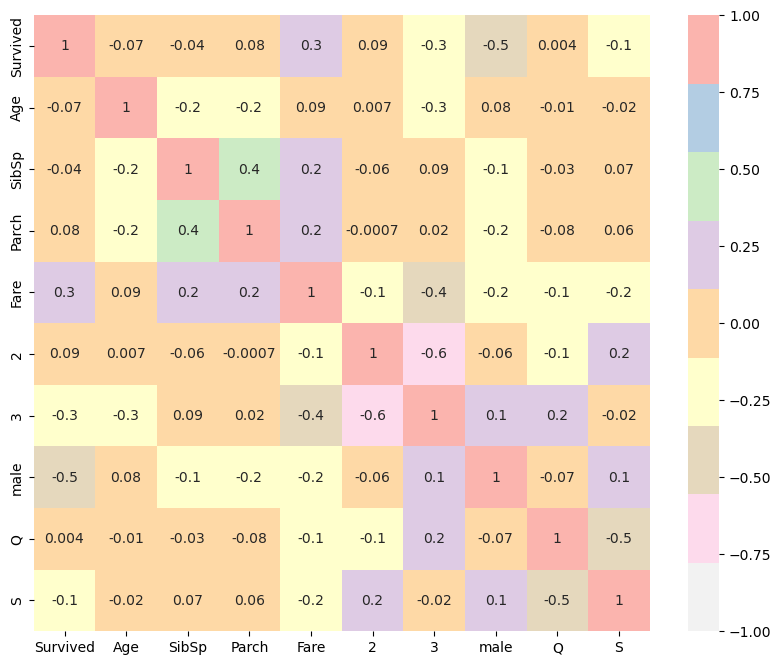

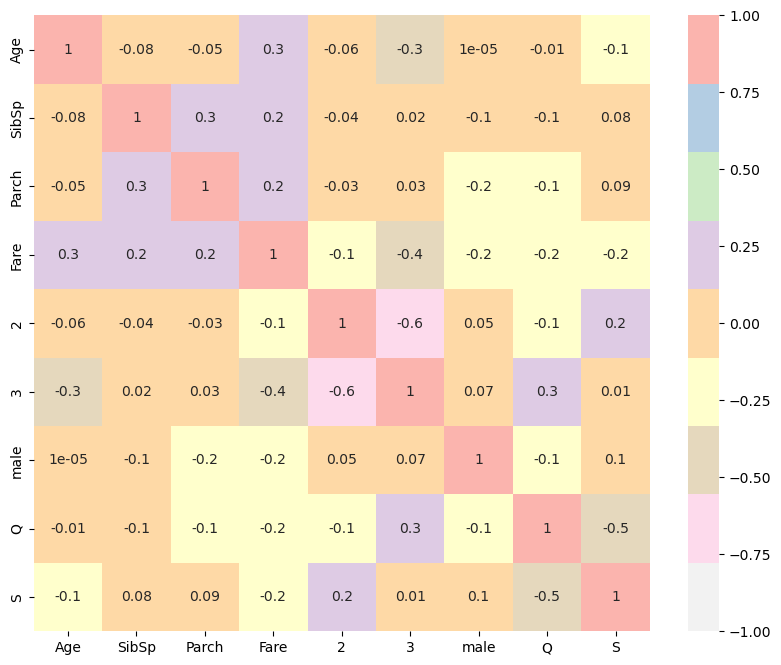

In [113]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                annot= True,
                fmt='.1g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### DEFINING FUNCTIONS TO CHECK FOR MULTICOLLINEARITY OF FEATURES IN DATASET

In [114]:
def corr_v1(df, cut) :
        
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    drop = []

        
    # For loop implements this pseudocode
    # For every cell in the upper triangle: 
        # If cell.value > 0.6: 
                # If mean(row_correlation) > mean(column_correlation):drop(column)
		# Else: drop(row)
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    drop.append(row)
                else: 
                    drop.append(col)
    
    drop_set = list(set(drop))
    # dropcols_idx = drop_set
    dropcols_names = list(df.columns[[item for item in drop_set]])
    
    return(dropcols_names)

def calcDrop(res):
    # All variables with correlation > cutoff
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # All unique variables in drop column
    poss_drop = list(set(res['drop'].tolist()))

    # Keep any variable not in drop column
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    # Drop any variables in same row as a keep variable
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    # Remove drop variables from possible drop 
    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    # subset res dataframe to include possible drop pairs
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    # remove rows that are decided (drop), take set and add to drops
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop

def corr_v2(df, cut) :
       
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = []
    
    res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                 'v2.target','corr', 'drop' ]))
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([ corr_mtx.index[row],
                up.columns[col],
                avg_corr[row],
                avg_corr[col],
                up.iloc[row,col],
                drop],
                index = res.columns)
        
                res = res.append(s, ignore_index = True)
    
    dropcols_names = calcDrop(res)
    
    return(dropcols_names)

#### PRINTING FEATURES WHICH CAUSES MULTICOLLINEARITY IN DATA_TRAIN

In [115]:
drop = corr_v1(data_train, 0.75)
print(drop)

drop_new = corr_v2(data_train, 0.75)
print(drop_new)
      
print(list(set(drop).difference(set(drop_new)))) 

[]
[]
[]


#### PRINTING FEATURES WHICH CAUSES MULTICOLLINEARITY IN DATA_TEST

In [116]:
drop = corr_v1(data_test, 0.75)
print(drop)

drop_new = corr_v2(data_test, 0.75)
print(drop_new)
      
print(list(set(drop).difference(set(drop_new)))) 

[]
[]
[]


#### DEFINING CLASSIFICATION MODELS WITH HYPERPARAMETERS

In [117]:
models = [
    make_pipeline(RobustScaler(), LogisticRegression(class_weight='balanced', 
                                                       solver='liblinear', 
                                                       penalty='l1', 
                                                       C=0.4, 
                                                       random_state=42)),
    make_pipeline(RobustScaler(), LogisticRegression(class_weight='balanced', 
                                                       solver='liblinear', 
                                                       penalty='l2', 
                                                       C=0.4, 
                                                       random_state=42)),
    make_pipeline(RobustScaler(), svm.SVC(C=0.4)),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),  
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier()
    ]

#### DEFINING X, Y, X_VAL TO TRAIN MODELS ON

In [118]:
X = data_train.drop('Survived', axis= 1)
y = data_train['Survived']

X_val = data_test

#### SPLITTING DATA TO CREATE X_TRAIN, X_TEST, Y_TRAIN, Y_TEST

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#### DEFINING CROSS-VALIDATION TO AVOID OVER-FITTING

In [120]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### TRAINING ALL MODELS ON TRAIN DATA AND PRINTING ACCURACY SCORE FOR ALL MODELS

In [121]:
model_name = []
train_score = []
test_score = []

for model in models:
    model.fit(X_train.values,y_train)
    score = cross_validate(model, X_train.values, y_train, cv=kfold, scoring='accuracy', return_train_score=True)
    model_name.append(type(model).__name__)
    train_score.append(score['train_score'].mean())
    test_score.append(score['test_score'].mean())
    print(type(model).__name__)
    print(score['train_score'].mean())
    print(score['test_score'].mean())

Pipeline
0.787751704455367
0.7684873949579832
Pipeline
0.7831369025597661
0.7701540616246498
Pipeline
0.8217289431495868
0.7969607843137255
KNeighborsClassifier
0.7965620210348291
0.7181792717086835
DecisionTreeClassifier
0.9832205838310166
0.7668347338935574
RandomForestClassifier
0.9832205838310166
0.8003221288515405
GradientBoostingClassifier
0.9207238870390924
0.8221988795518207
XGBClassifier
0.9781873755791626
0.7885854341736696
ExtraTreesClassifier
0.9832205838310166
0.7902801120448179
AdaBoostClassifier
0.8494177545231929
0.8003921568627451


#### PRINTING DATAFRAME WITH SCORES FOR ALL MODELS

In [122]:
overview = pd.concat([pd.DataFrame(model_name).rename(columns={pd.DataFrame(model_name).columns[0]: 'Model name'}), 
                      pd.DataFrame(train_score).rename(columns={pd.DataFrame(train_score).columns[0]: 'Accuracy score train'}), 
                      pd.DataFrame(test_score).rename(columns={pd.DataFrame(test_score).columns[0]: 'Accuracy score test '})], 
                      axis=1)

overview

,Model name,Accuracy score train,Accuracy score test
0,Pipeline,0.787752,0.768487
1,Pipeline,0.783137,0.770154
2,Pipeline,0.821729,0.796961
3,KNeighborsClassifier,0.796562,0.718179
4,DecisionTreeClassifier,0.983221,0.766835
5,RandomForestClassifier,0.983221,0.800322
6,GradientBoostingClassifier,0.920724,0.822199
7,XGBClassifier,0.978187,0.788585
8,ExtraTreesClassifier,0.983221,0.790280
9,AdaBoostClassifier,0.849418,0.800392


#### HYPERPARAMETER TUNING FOR BEST NON-OVERFITTED MODEL

In [123]:
pipeline = make_pipeline(RobustScaler(), svm.SVC())

param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],  
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'svc__kernel': ['rbf']}  
  
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid, 
                    scoring='accuracy', 
                    cv = kfold,
                    return_train_score=True)
  
# fitting the model for grid search 
grid.fit(X_train.values, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

print(grid.best_score_)

print(grid.score(X_test.values, y_test))

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svc', SVC(C=10, gamma=0.1))])
0.8271708683473389
0.8067796610169492


In [ ]:
import keras

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

classifier = Sequential()

classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))
classifier.add(Dropout(0.2))

classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.add(Dropout(0.2))

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 1000)

Epoch 1/1000
40/40 [==============================] - 2s 13ms/step - loss: 7.7769 - accuracy: 0.3734 - val_loss: 2.4613 - val_accuracy: 0.4315
Epoch 2/1000
40/40 [==============================] - 0s 5ms/step - loss: 6.4591 - accuracy: 0.4035 - val_loss: 2.0864 - val_accuracy: 0.4365
Epoch 3/1000
40/40 [==============================] - 0s 4ms/step - loss: 5.4440 - accuracy: 0.4185 - val_loss: 1.9690 - val_accuracy: 0.4365
Epoch 4/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.9217 - accuracy: 0.3910 - val_loss: 1.9239 - val_accuracy: 0.4772
Epoch 5/1000
40/40 [==============================] - 0s 5ms/step - loss: 5.1296 - accuracy: 0.4236 - val_loss: 1.8683 - val_accuracy: 0.5025
Epoch 6/1000
40/40 [==============================] - 0s 5ms/step - loss: 5.3916 - accuracy: 0.3935 - val_loss: 1.8510 - val_accuracy: 0.5076
Epoch 7/1000
40/40 [==============================] - 0s 5ms/step - loss: 5.2565 - accuracy: 0.3935 - val_loss: 1.8306 - val_accuracy: 0.5279
Epoch

40/40 [==============================] - 0s 6ms/step - loss: 3.2167 - accuracy: 0.6241 - val_loss: 0.7109 - val_accuracy: 0.6041
Epoch 59/1000
40/40 [==============================] - 0s 5ms/step - loss: 3.3801 - accuracy: 0.6366 - val_loss: 0.6894 - val_accuracy: 0.6244
Epoch 60/1000
40/40 [==============================] - 0s 5ms/step - loss: 3.3163 - accuracy: 0.5940 - val_loss: 0.6842 - val_accuracy: 0.6142
Epoch 61/1000
40/40 [==============================] - 0s 5ms/step - loss: 3.3876 - accuracy: 0.5990 - val_loss: 0.6817 - val_accuracy: 0.6091
Epoch 62/1000
40/40 [==============================] - 0s 5ms/step - loss: 3.6993 - accuracy: 0.5840 - val_loss: 0.6848 - val_accuracy: 0.5990
Epoch 63/1000
40/40 [==============================] - 0s 4ms/step - loss: 3.3075 - accuracy: 0.5990 - val_loss: 0.6844 - val_accuracy: 0.6091
Epoch 64/1000
40/40 [==============================] - 0s 4ms/step - loss: 3.2143 - accuracy: 0.5840 - val_loss: 0.6834 - val_accuracy: 0.6091
Epoch 65/1000

40/40 [==============================] - 0s 5ms/step - loss: 2.4805 - accuracy: 0.6090 - val_loss: 0.6853 - val_accuracy: 0.6041
Epoch 116/1000
40/40 [==============================] - 0s 4ms/step - loss: 2.4056 - accuracy: 0.6341 - val_loss: 0.6877 - val_accuracy: 0.6041
Epoch 117/1000
40/40 [==============================] - 0s 5ms/step - loss: 2.1397 - accuracy: 0.6692 - val_loss: 0.6877 - val_accuracy: 0.5990
Epoch 118/1000
40/40 [==============================] - 0s 5ms/step - loss: 2.4781 - accuracy: 0.6241 - val_loss: 0.6860 - val_accuracy: 0.5990
Epoch 119/1000
40/40 [==============================] - 0s 5ms/step - loss: 2.2594 - accuracy: 0.6366 - val_loss: 0.6834 - val_accuracy: 0.5990
Epoch 120/1000
40/40 [==============================] - 0s 4ms/step - loss: 2.5757 - accuracy: 0.6216 - val_loss: 0.6817 - val_accuracy: 0.6041
Epoch 121/1000
40/40 [==============================] - 0s 5ms/step - loss: 2.1690 - accuracy: 0.6566 - val_loss: 0.6830 - val_accuracy: 0.6041
Epoch 1

Epoch 172/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.6686 - accuracy: 0.6190 - val_loss: 0.7167 - val_accuracy: 0.5635
Epoch 173/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6093 - accuracy: 0.6341 - val_loss: 0.7168 - val_accuracy: 0.5635
Epoch 174/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.4473 - accuracy: 0.6617 - val_loss: 0.7125 - val_accuracy: 0.5685
Epoch 175/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4887 - accuracy: 0.6416 - val_loss: 0.7127 - val_accuracy: 0.5685
Epoch 176/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.7357 - accuracy: 0.6416 - val_loss: 0.7113 - val_accuracy: 0.5736
Epoch 177/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5990 - accuracy: 0.6491 - val_loss: 0.7138 - val_accuracy: 0.5736
Epoch 178/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5243 - accuracy: 0.6516 - val_loss: 0.7094 - val_accuracy:

Epoch 229/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.8087 - accuracy: 0.6742 - val_loss: 0.6867 - val_accuracy: 0.5736
Epoch 230/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.4943 - accuracy: 0.6917 - val_loss: 0.6852 - val_accuracy: 0.5736
Epoch 231/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.2587 - accuracy: 0.6892 - val_loss: 0.6844 - val_accuracy: 0.5736
Epoch 232/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5050 - accuracy: 0.6892 - val_loss: 0.6845 - val_accuracy: 0.5736
Epoch 233/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5279 - accuracy: 0.7118 - val_loss: 0.6841 - val_accuracy: 0.5787
Epoch 234/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.4633 - accuracy: 0.6992 - val_loss: 0.6866 - val_accuracy: 0.5736
Epoch 235/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5515 - accuracy: 0.7018 - val_loss: 0.6842 - val_accuracy:

Epoch 286/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3811 - accuracy: 0.6942 - val_loss: 0.6747 - val_accuracy: 0.5787
Epoch 287/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5254 - accuracy: 0.6842 - val_loss: 0.6730 - val_accuracy: 0.5787
Epoch 288/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.6352 - accuracy: 0.6767 - val_loss: 0.6770 - val_accuracy: 0.5787
Epoch 289/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3832 - accuracy: 0.7018 - val_loss: 0.6770 - val_accuracy: 0.5787
Epoch 290/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.8883 - accuracy: 0.6942 - val_loss: 0.6767 - val_accuracy: 0.5787
Epoch 291/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6343 - accuracy: 0.6867 - val_loss: 0.6701 - val_accuracy: 0.5838
Epoch 292/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.8541 - accuracy: 0.6917 - val_loss: 0.6704 - val_accuracy:

Epoch 343/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4655 - accuracy: 0.6967 - val_loss: 0.6529 - val_accuracy: 0.5838
Epoch 344/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.9136 - accuracy: 0.6817 - val_loss: 0.6526 - val_accuracy: 0.5838
Epoch 345/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.5117 - accuracy: 0.7093 - val_loss: 0.6581 - val_accuracy: 0.5838
Epoch 346/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.5728 - accuracy: 0.7043 - val_loss: 0.6684 - val_accuracy: 0.5838
Epoch 347/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.6565 - accuracy: 0.6967 - val_loss: 0.6512 - val_accuracy: 0.5838
Epoch 348/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.5136 - accuracy: 0.6942 - val_loss: 0.6435 - val_accuracy: 0.5838
Epoch 349/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.5028 - accuracy: 0.6942 - val_loss: 0.6521 - val_accuracy:

Epoch 400/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.2745 - accuracy: 0.6892 - val_loss: 0.6464 - val_accuracy: 0.5838
Epoch 401/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4046 - accuracy: 0.7343 - val_loss: 0.6500 - val_accuracy: 0.5838
Epoch 402/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6741 - accuracy: 0.6842 - val_loss: 0.6527 - val_accuracy: 0.5838
Epoch 403/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.6632 - accuracy: 0.7068 - val_loss: 0.6445 - val_accuracy: 0.5838
Epoch 404/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.8427 - accuracy: 0.6692 - val_loss: 0.6523 - val_accuracy: 0.5888
Epoch 405/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.5511 - accuracy: 0.6942 - val_loss: 0.6583 - val_accuracy: 0.5838
Epoch 406/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.6780 - accuracy: 0.6992 - val_loss: 0.6524 - val_accuracy:

Epoch 457/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5016 - accuracy: 0.7193 - val_loss: 0.6580 - val_accuracy: 0.5888
Epoch 458/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.4654 - accuracy: 0.7143 - val_loss: 0.6659 - val_accuracy: 0.5888
Epoch 459/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.3552 - accuracy: 0.7343 - val_loss: 0.6598 - val_accuracy: 0.5888
Epoch 460/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.9596 - accuracy: 0.6992 - val_loss: 0.6557 - val_accuracy: 0.5888
Epoch 461/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4121 - accuracy: 0.6992 - val_loss: 0.6437 - val_accuracy: 0.5838
Epoch 462/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3517 - accuracy: 0.7218 - val_loss: 0.6434 - val_accuracy: 0.5838
Epoch 463/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.3327 - accuracy: 0.7068 - val_loss: 0.6381 - val_accuracy:

Epoch 514/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6551 - accuracy: 0.6667 - val_loss: 0.6458 - val_accuracy: 0.5888
Epoch 515/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4230 - accuracy: 0.7193 - val_loss: 0.6493 - val_accuracy: 0.5888
Epoch 516/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6482 - accuracy: 0.7093 - val_loss: 0.6405 - val_accuracy: 0.5888
Epoch 517/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4351 - accuracy: 0.6992 - val_loss: 0.6403 - val_accuracy: 0.5888
Epoch 518/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5353 - accuracy: 0.6992 - val_loss: 0.6417 - val_accuracy: 0.5888
Epoch 519/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5401 - accuracy: 0.6892 - val_loss: 0.6307 - val_accuracy: 0.5888
Epoch 520/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6748 - accuracy: 0.6642 - val_loss: 0.6332 - val_accuracy:

Epoch 571/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.7213 - accuracy: 0.7168 - val_loss: 0.6394 - val_accuracy: 0.5838
Epoch 572/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6058 - accuracy: 0.7293 - val_loss: 0.6416 - val_accuracy: 0.5838
Epoch 573/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3193 - accuracy: 0.7368 - val_loss: 0.6490 - val_accuracy: 0.5838
Epoch 574/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3142 - accuracy: 0.7293 - val_loss: 0.6411 - val_accuracy: 0.5838
Epoch 575/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.1603 - accuracy: 0.7544 - val_loss: 0.6363 - val_accuracy: 0.5838
Epoch 576/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5948 - accuracy: 0.7243 - val_loss: 0.6299 - val_accuracy: 0.5888
Epoch 577/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5125 - accuracy: 0.7343 - val_loss: 0.6252 - val_accuracy:

Epoch 628/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3789 - accuracy: 0.7544 - val_loss: 0.6120 - val_accuracy: 0.6447
Epoch 629/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.7174 - accuracy: 0.7368 - val_loss: 0.6177 - val_accuracy: 0.6447
Epoch 630/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3417 - accuracy: 0.7544 - val_loss: 0.6171 - val_accuracy: 0.6447
Epoch 631/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5035 - accuracy: 0.7444 - val_loss: 0.6211 - val_accuracy: 0.6447
Epoch 632/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4937 - accuracy: 0.7594 - val_loss: 0.6208 - val_accuracy: 0.5736
Epoch 633/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6859 - accuracy: 0.7243 - val_loss: 0.6253 - val_accuracy: 0.5736
Epoch 634/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.8021 - accuracy: 0.7043 - val_loss: 0.6396 - val_accuracy:

Epoch 685/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.6817 - accuracy: 0.7243 - val_loss: 0.5916 - val_accuracy: 0.6599
Epoch 686/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.2190 - accuracy: 0.7669 - val_loss: 0.5883 - val_accuracy: 0.6599
Epoch 687/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5563 - accuracy: 0.7719 - val_loss: 0.5945 - val_accuracy: 0.6701
Epoch 688/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6616 - accuracy: 0.7544 - val_loss: 0.5984 - val_accuracy: 0.6650
Epoch 689/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.2935 - accuracy: 0.7519 - val_loss: 0.5942 - val_accuracy: 0.6650
Epoch 690/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.8610 - accuracy: 0.7444 - val_loss: 0.5947 - val_accuracy: 0.6701
Epoch 691/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3449 - accuracy: 0.7845 - val_loss: 0.6045 - val_accuracy:

Epoch 742/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.6207 - accuracy: 0.7469 - val_loss: 0.6000 - val_accuracy: 0.6751
Epoch 743/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4417 - accuracy: 0.7644 - val_loss: 0.6019 - val_accuracy: 0.6751
Epoch 744/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.7022 - accuracy: 0.7268 - val_loss: 0.5927 - val_accuracy: 0.6751
Epoch 745/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4976 - accuracy: 0.7343 - val_loss: 0.5965 - val_accuracy: 0.6751
Epoch 746/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6876 - accuracy: 0.7644 - val_loss: 0.5973 - val_accuracy: 0.6751
Epoch 747/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.2911 - accuracy: 0.7719 - val_loss: 0.5908 - val_accuracy: 0.6751
Epoch 748/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3198 - accuracy: 0.7694 - val_loss: 0.5956 - val_accuracy:

Epoch 799/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5496 - accuracy: 0.7794 - val_loss: 0.5811 - val_accuracy: 0.6751
Epoch 800/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4095 - accuracy: 0.7694 - val_loss: 0.5819 - val_accuracy: 0.6751
Epoch 801/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4435 - accuracy: 0.7444 - val_loss: 0.5887 - val_accuracy: 0.6751
Epoch 802/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4975 - accuracy: 0.7469 - val_loss: 0.5913 - val_accuracy: 0.6751
Epoch 803/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5312 - accuracy: 0.7519 - val_loss: 0.5834 - val_accuracy: 0.6751
Epoch 804/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.6048 - accuracy: 0.7318 - val_loss: 0.5805 - val_accuracy: 0.6751
Epoch 805/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.5237 - accuracy: 0.7393 - val_loss: 0.5809 - val_accuracy:

Epoch 856/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.4586 - accuracy: 0.7594 - val_loss: 0.5922 - val_accuracy: 0.6701
Epoch 857/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.2135 - accuracy: 0.7694 - val_loss: 0.5907 - val_accuracy: 0.6802
Epoch 858/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.4479 - accuracy: 0.7469 - val_loss: 0.5908 - val_accuracy: 0.6751
Epoch 859/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.5039 - accuracy: 0.7669 - val_loss: 0.6026 - val_accuracy: 0.6802
Epoch 860/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.2068 - accuracy: 0.7769 - val_loss: 0.5890 - val_accuracy: 0.6904
Epoch 861/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.4242 - accuracy: 0.7845 - val_loss: 0.5941 - val_accuracy: 0.6853
Epoch 862/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.4470 - accuracy: 0.7895 - val_loss: 0.6062 - val_accuracy:

Epoch 913/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.5978 - accuracy: 0.7419 - val_loss: 0.6010 - val_accuracy: 0.6751
Epoch 914/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.3710 - accuracy: 0.7594 - val_loss: 0.5781 - val_accuracy: 0.6802
Epoch 915/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.4225 - accuracy: 0.7694 - val_loss: 0.5800 - val_accuracy: 0.6802
Epoch 916/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3600 - accuracy: 0.7895 - val_loss: 0.5785 - val_accuracy: 0.6802
Epoch 917/1000
40/40 [==============================] - 0s 5ms/step - loss: 1.3906 - accuracy: 0.7769 - val_loss: 0.5801 - val_accuracy: 0.6802
Epoch 918/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.7319 - accuracy: 0.7419 - val_loss: 0.5796 - val_accuracy: 0.6802
Epoch 919/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.3600 - accuracy: 0.7694 - val_loss: 0.5787 - val_accuracy:

In [ ]:
classifier.summary()